# Modeling

In [771]:
# Import packages

# Data Cleaning
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans #For KMeans
from sklearn.cluster import AgglomerativeClustering #hierarchy
import scipy.cluster.hierarchy as sch #hierarchy
from sklearn.cluster import DBSCAN #DBSCAN
%matplotlib inline

# Dimensionality Reduction
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Feature Engineering
Created several new features based off data from original starting features, which were collected from various API's and JSON datasets.

In [772]:
# Load dataset
nyc = pd.read_csv('clean_data/nyc_neighbourhoods_data.csv')
nyc.head()

,Borough,Neighbourhood,Latitude,Longitude,Zipcode,Restaurant_Count_Name,Restaurant_Count_Reviews,Restaurant_Count_Rating,Restaurant_Count_Price,Restaurant_Mean_Distance (m),...,Rat_Mean_Created Day,Rat_Mean_Closed Year,Rat_Mean_Closed Month,Rat_Mean_Closed Day,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Count_Ride Count,Uber_Mean_Month,Uber_Mean_Day,Uber_Mean_Ride Count
0,Bronx,Wakefield,40.894705,-73.847201,10466.0,23,0,8,22,741.608696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bronx,Co-op City,40.874294,-73.829939,10475.0,25,0,18,25,749.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bronx,Eastchester,40.887556,-73.827806,10466.0,25,0,24,25,554.440000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bronx,Fieldston,40.895437,-73.905643,10471.0,25,0,16,24,875.120000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bronx,Riverdale,40.890834,-73.912585,10463.0,25,0,23,25,633.560000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [773]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Borough                       306 non-null    object 
 1   Neighbourhood                 306 non-null    object 
 2   Latitude                      306 non-null    float64
 3   Longitude                     306 non-null    float64
 4   Zipcode                       304 non-null    float64
 5   Restaurant_Count_Name         306 non-null    int64  
 6   Restaurant_Count_Reviews      306 non-null    int64  
 7   Restaurant_Count_Rating       306 non-null    int64  
 8   Restaurant_Count_Price        306 non-null    int64  
 9   Restaurant_Mean_Distance (m)  304 non-null    float64
 10  Restaurant_Mean_Reviews       144 non-null    float64
 11  Restaurant_Mean_Rating        302 non-null    float64
 12  Restaurant_Mean_Price         304 non-null    float64
 13  Resta

## Dimensionality Reduction

#### Preparation

In [774]:
# Encode categorical (ordinal) features for use in dimensionality reduction
from sklearn.preprocessing import LabelEncoder

# Set variable to label encoder class
gle = LabelEncoder()

# Encode Boroughs feature
Borough_Labels = gle.fit_transform(nyc['Borough'])
Borough_mappings = {index: label for index, label in enumerate(gle.classes_)}
nyc['Borough_Label'] = Borough_Labels

# Encode Neighbourhood feature
Neighbourhood_Labels = gle.fit_transform(nyc['Neighbourhood'])
Neighbourhood_mappings = {index: label for index, label in enumerate(gle.classes_)}
nyc['Neighbourhood_Label'] = Neighbourhood_Labels

In [775]:
nyc.columns

Index(['Borough', 'Neighbourhood', 'Latitude', 'Longitude', 'Zipcode',
       'Restaurant_Count_Name', 'Restaurant_Count_Reviews',
       'Restaurant_Count_Rating', 'Restaurant_Count_Price',
       'Restaurant_Mean_Distance (m)', 'Restaurant_Mean_Reviews',
       'Restaurant_Mean_Rating', 'Restaurant_Mean_Price',
       'Restaurant_Sum_Reviews', 'Restaurant_Sum_Rating',
       'Restaurant_Sum_Price', 'School_Count_Name', 'School_Mean_Reviews',
       'School_Mean_Rating', 'School_Sum_Reviews', 'School_Sum_Rating',
       'School_Sum_Price', 'Park_Count_Name', 'Park_Mean_Reviews',
       'Park_Mean_Rating', 'Park_Sum_Reviews', 'Park_Sum_Rating',
       'Transit_Count_Name', 'Transit_Mean_Reviews', 'Transit_Mean_Rating',
       'Transit_Sum_Reviews', 'Transit_Sum_Rating', 'Grocery_Count_Name',
       'Grocery_Mean_Reviews', 'Grocery_Mean_Rating', 'Grocery_Sum_Reviews',
       'Grocery_Sum_Rating', 'Rat_Sum_Case Open?',
       'Rat_Sum_Days Complaint Open', 'Rat_Count_Created Date',
     

In [776]:
# Scale all feautures for PCA computation
s_scaler = StandardScaler()
n_scaler = MinMaxScaler()
r_scaler = RobustScaler()

nyc_test = nyc[[
       'Restaurant_Count_Name', 'Restaurant_Count_Reviews',
       'Restaurant_Count_Rating', 'Restaurant_Count_Price',
       'Restaurant_Mean_Distance (m)', 'Restaurant_Mean_Reviews',
       'Restaurant_Mean_Rating', 'Restaurant_Mean_Price',
       'Restaurant_Sum_Reviews', 'Restaurant_Sum_Rating',
       'Restaurant_Sum_Price', 'School_Count_Name', 'Park_Count_Name', 'Park_Mean_Reviews',
       'Park_Mean_Rating', 'Park_Sum_Reviews',
       'Transit_Count_Name', 'Transit_Mean_Reviews', 'Transit_Mean_Rating',
       'Transit_Sum_Reviews', 'Transit_Sum_Rating', 'Grocery_Count_Name',
       'Grocery_Mean_Reviews', 'Grocery_Mean_Rating', 'Grocery_Sum_Reviews',
       'Grocery_Sum_Rating', 'Rat_Sum_Case Open?',
       'Rat_Sum_Days Complaint Open', 'Rat_Count_Created Date',
       'Rat_Count_Closed Date', 'Rat_Mean_Case Open?', 'Rat_Mean_Created Year',
       'Rat_Mean_Created Month', 'Rat_Mean_Created Day',
       'Rat_Mean_Closed Year', 'Rat_Mean_Closed Month', 'Rat_Mean_Closed Day',
       'Rat_Mean_Days Complaint Open', 'Uber_Sum_Ride Count',
       'Uber_Mean_Ride Count', 'Borough_Label', 'Neighbourhood_Label'
       ]]

nyc_scaled = pd.DataFrame(n_scaler.fit_transform(nyc_test), columns=nyc_test.columns)

In [777]:
nyc_scaled.head()

,Restaurant_Count_Name,Restaurant_Count_Reviews,Restaurant_Count_Rating,Restaurant_Count_Price,Restaurant_Mean_Distance (m),Restaurant_Mean_Reviews,Restaurant_Mean_Rating,Restaurant_Mean_Price,Restaurant_Sum_Reviews,Restaurant_Sum_Rating,...,Rat_Mean_Created Month,Rat_Mean_Created Day,Rat_Mean_Closed Year,Rat_Mean_Closed Month,Rat_Mean_Closed Day,Rat_Mean_Days Complaint Open,Uber_Sum_Ride Count,Uber_Mean_Ride Count,Borough_Label,Neighbourhood_Label
0,0.115,0.0,0.043478,0.160584,0.317891,NaN,0.498648,0.314171,0.0,0.039189,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.940199
1,0.125,0.0,0.097826,0.182482,0.322349,NaN,0.321163,0.331765,0.0,0.077153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.196013
2,0.125,0.0,0.130435,0.182482,0.213488,NaN,0.387368,0.331765,0.0,0.108352,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.275748
3,0.125,0.0,0.086957,0.175182,0.392364,NaN,0.490196,0.345588,0.0,0.077911,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.312292
4,0.125,0.0,0.125000,0.182482,0.257622,NaN,0.557809,0.387059,0.0,0.117362,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.774086


In [778]:
# Identify null values
nyc_scaled.isnull().sum()

# 1. Drop null values - removes significant amount of rows
nyc_scaled.dropna(inplace=True)

# # 2. Fill null values - potentially skews dataset
# nyc_scaled.fillna(0, inplace=True)

### Feature Selection (Filter Method)

In [779]:
# Before doing any transformations we will extract our target variable to keep it as it is
y = nyc_scaled.Borough_Label
nyc_df = nyc_scaled.drop('Borough_Label',axis=1)

In [780]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(0.02)
nyc_transformed = vt.fit_transform(nyc_df)

# get_support() is method of VarianceThreshold and stores boolean of each variable in the numpy array.
selected_columns = nyc_df.columns[vt.get_support()]

# transforming an array back to a data-frame preserves column labels
nyc_transformed = pd.DataFrame(nyc_transformed, columns = selected_columns)

# get_support() is method of VarianceThreshold and stores boolean of each variable in the numpy array.
selected_columns = nyc_df.columns[vt.get_support()]

# transforming an array back to a data-frame preserves column labels
nyc_transformed = pd.DataFrame(nyc_transformed, columns = selected_columns)

nyc_corr = nyc_transformed.corr().abs()

indices = np.where(nyc_corr > 0.4) 
indices = [(nyc_corr.index[x], nyc_corr.columns[y]) 
for x, y in zip(*indices)
    if x != y and x < y]

# Loop to create pairs from each column that passes the variance threshold and correlation criteria
for idx in indices: 
    try:
        nyc_transformed.drop(idx[1], axis = 1, inplace=True)
    except KeyError:
        pass

print(len(indices))

17


In [781]:
from sklearn.feature_selection import f_regression, SelectKBest

# Select most suitable features from pairs 
skb = SelectKBest(f_regression, k=1)
X = skb.fit_transform(nyc_transformed, y)

# Give the position of the top k features
skb.get_support()

# Format arrays to DataFrame
nyc_transformed.columns[skb.get_support()]
X = pd.DataFrame(X,columns=nyc_transformed.columns[skb.get_support()])
X.head()

,Grocery_Count_Name
0,0.333333
1,0.458333
2,0.458333
3,0.416667
4,0.083333


Top k features that could be used for clustering - not as helpful though as there is no visual aspect.

### Feature Selection (Correlation Heat Map)

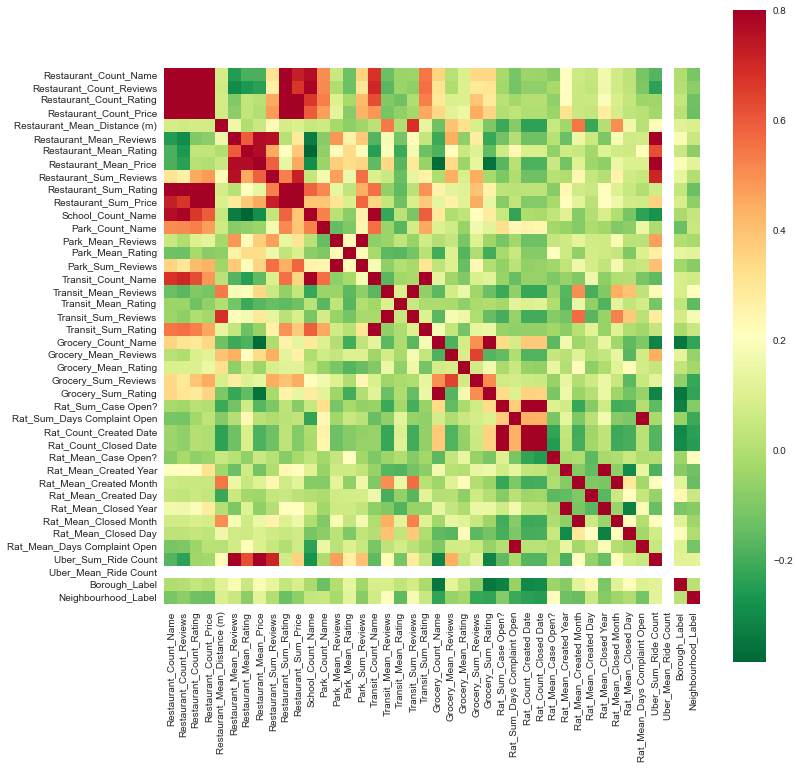

In [782]:
cormat = nyc_scaled.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(cormat, vmax=.8, square=True, cmap="RdYlGn_r");

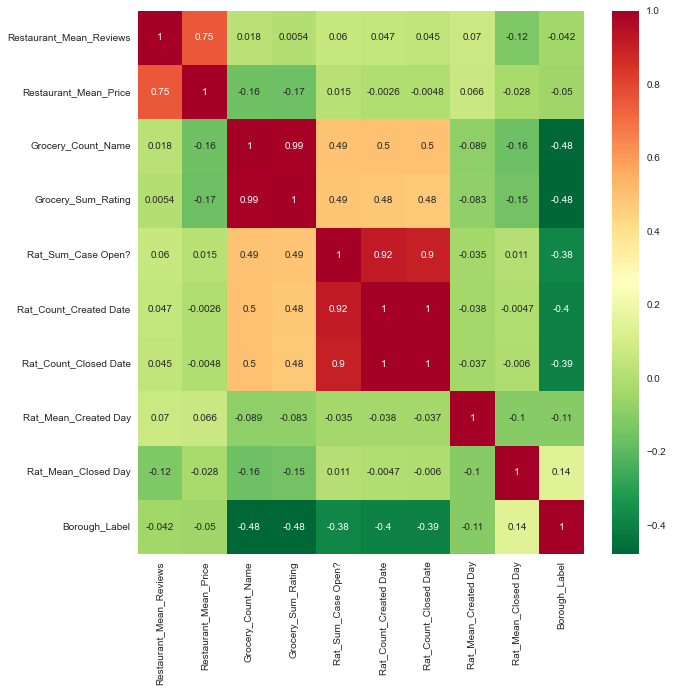

In [783]:
# Most correlated features with Borough
corrmat = nyc_scaled.corr()
top_corr_features = corrmat.index[abs(corrmat['Borough_Label'])>0.15]
plt.figure(figsize=(10,10))
g = sns.heatmap(nyc[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

Provides a visual aspect, but does directly input which features account for the most variance.

### Principal Component Analysis (PCA)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [90.0%] explained variance using the [42] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [15] that covers the [90.00%] explained variance.
[pca] >The PCA reduction is performed on the [42] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[15]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


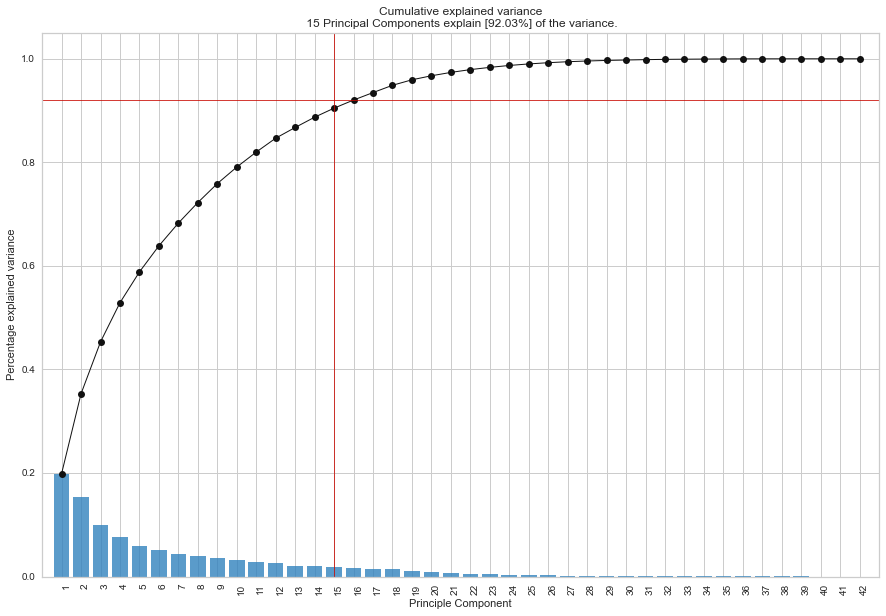

,PC,feature,loading,type
0,PC1,Restaurant_Count_Rating,3.378706e-01,best
1,PC2,Uber_Sum_Ride Count,3.215088e-01,best
2,PC3,Restaurant_Mean_Rating,-2.906622e-01,best
3,PC4,Transit_Sum_Reviews,3.431860e-01,best
4,PC5,Rat_Mean_Created Year,5.188096e-01,best
5,PC6,Rat_Mean_Days Complaint Open,-4.332148e-01,best
6,PC7,Neighbourhood_Label,3.433251e-01,best
7,PC8,Grocery_Mean_Reviews,-4.941961e-01,best
8,PC9,Rat_Mean_Closed Day,-4.059097e-01,best
9,PC10,Rat_Mean_Case Open?,6.850852e-01,best


<Figure size 432x288 with 0 Axes>

In [784]:
from pca import pca

# Initialize with normalization
model = pca(normalize=True, n_components=.90) #n_components -> Set to None if you wanna keep all

# Fit scaled DataFrame
results = model.fit_transform(nyc_scaled) 
# results = model.fit_transform(X, col_labels=labels, row_labels=y) # Array

# Scree plot with explained variance
model.plot()

# Top performing features
model.results['topfeat']

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [72] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [72] unique colors! Available unique colors: [9].


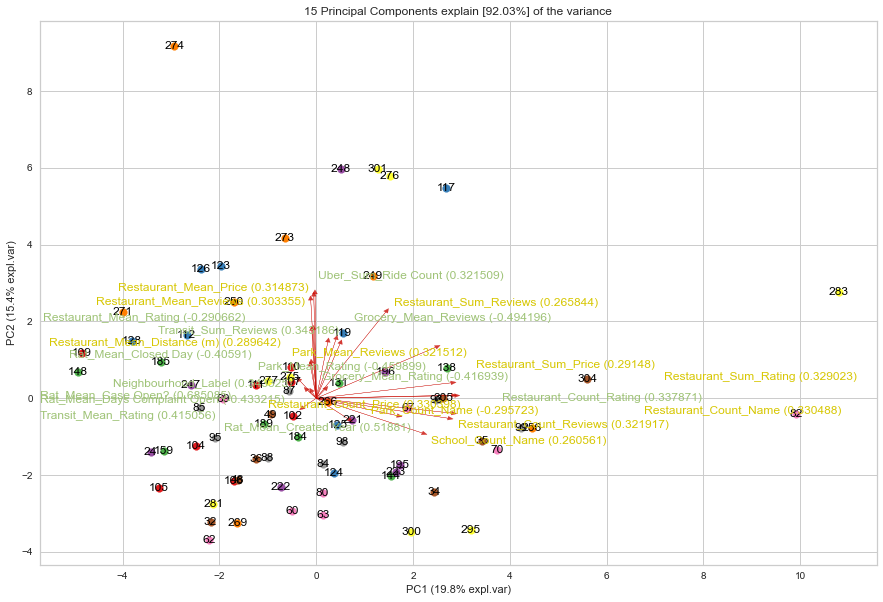

In [785]:
# Model PCA using 2D biplot
model.biplot(y=None, legend=False);

In [786]:
# Create a DataFrame of the top PCA components
def apply_pca(df, components):
    columns = []
    for i in range(components):
        columns.append(f'column {i + 1}')
    pca = PCA(n_components=components)
    result = pca.fit_transform(df)
    pca_df = pd.DataFrame(data = result, columns=columns)
    return pca_df

In [787]:
# Create new DataFrame with top PCA components
pca_scaled = apply_pca(nyc_scaled, 15)
pca_scaled.head()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15
0,-0.125853,-0.689685,-0.079210,-0.137068,-0.242515,-0.207338,0.366578,-0.098417,-0.078072,-0.033841,-0.036860,0.122881,0.092928,-0.224835,0.131378
1,-0.354819,-0.409980,0.052647,0.407632,-0.377978,-0.104088,0.206327,0.149318,0.090408,0.008220,0.110877,0.106844,-0.147333,-0.094072,-0.072602
2,-0.609414,0.303747,0.189548,0.005268,0.205368,-0.114633,0.559779,0.122627,-0.003301,0.004926,-0.004728,0.075150,0.054459,0.030749,-0.134394
3,-0.194695,0.171448,0.480626,0.374750,-0.301582,0.019698,0.149033,-0.204884,0.344534,-0.076559,0.105441,-0.031731,0.014281,-0.091826,-0.102854
4,0.044977,-0.649865,0.161577,0.135115,-0.071015,-0.238614,0.484328,-0.183995,0.045420,-0.164694,0.313531,-0.010280,-0.110336,-0.064911,-0.100744


## Modeling

#### Preparation

In [788]:
# Set up the clustering models

# Cluster for all features, based on top principal components
X = pca_scaled

# K-Means
km = KMeans(n_clusters=3, init='k-means++')
y_km = km.fit_predict(X)

# Hierarchical
ac = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters=4)
y_ac = ac.fit_predict(X)

# DBSCAN
dpebs = 0.8
dbsample = 2
db = DBSCAN(eps=dpebs, min_samples=dbsample, metric='euclidean')
y_db = db.fit_predict(X)

In [789]:
# Create function to plot clusters
def plot_clusters(X,y_res, x_label="X-axis", y_label="Y-axis", plt_cluster_centers=True):
    
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')

    plt.rcParams["figure.figsize"]=(15,8) 
    plt.legend()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid()
    plt.show()

In [790]:
def scatter(X, y_res, plt_cluster_centers=False):

    X_centroids = []
    Y_centroids = []
    
    plt.rcParams["figure.figsize"]=(15,8) 

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    c='black',
                    s=50,
                    marker='s',
                    )
    plt.grid()
    plt.show()

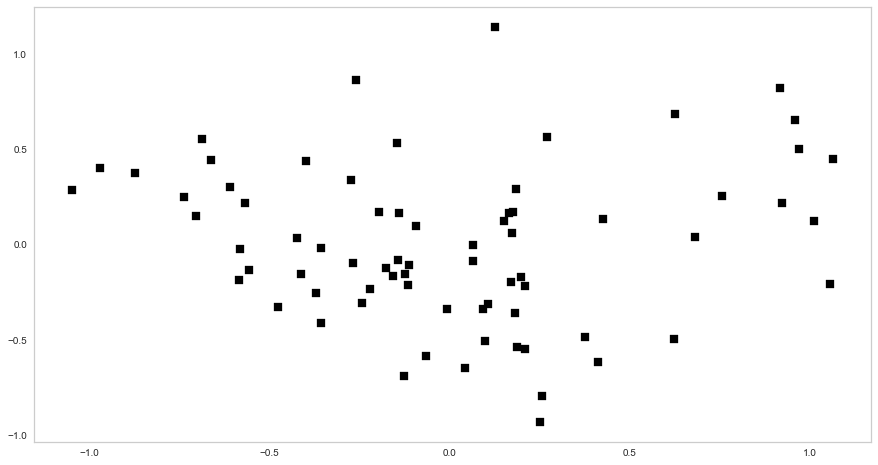

In [791]:
# Create scatter plot without clusters
scatter(np.array(pca_scaled), y_km);

#### K-Means Clustering

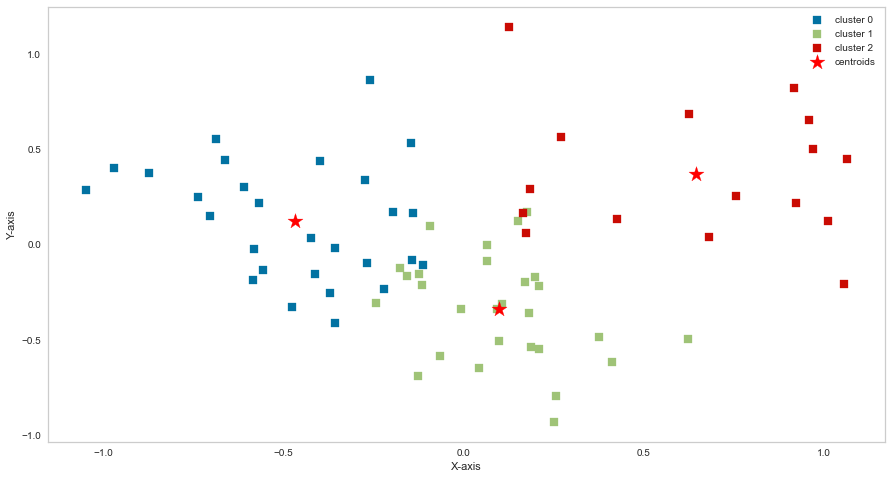

In [792]:
# K-Means Cluster
plot_clusters(np.array(pca_scaled), y_km)

#### Hierarchical Cluster

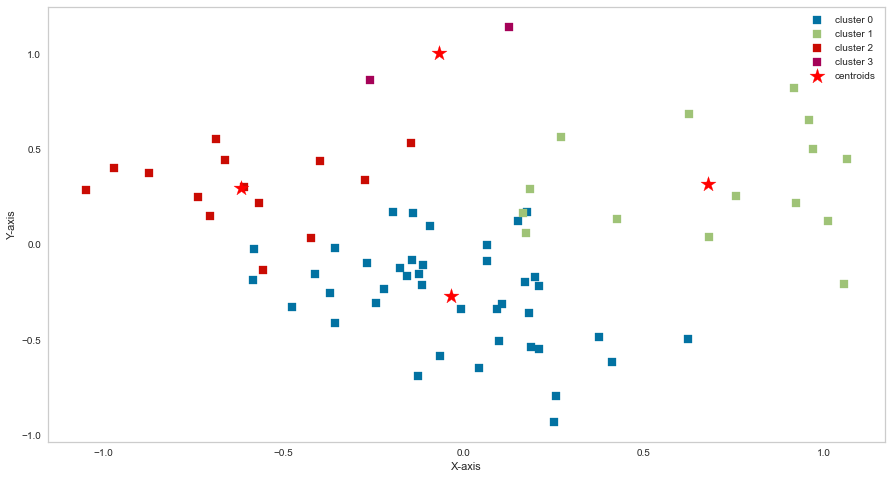

In [793]:
# Hierarchical Cluster
plot_clusters(np.array(X), y_ac)

#### DBSCAN Cluster

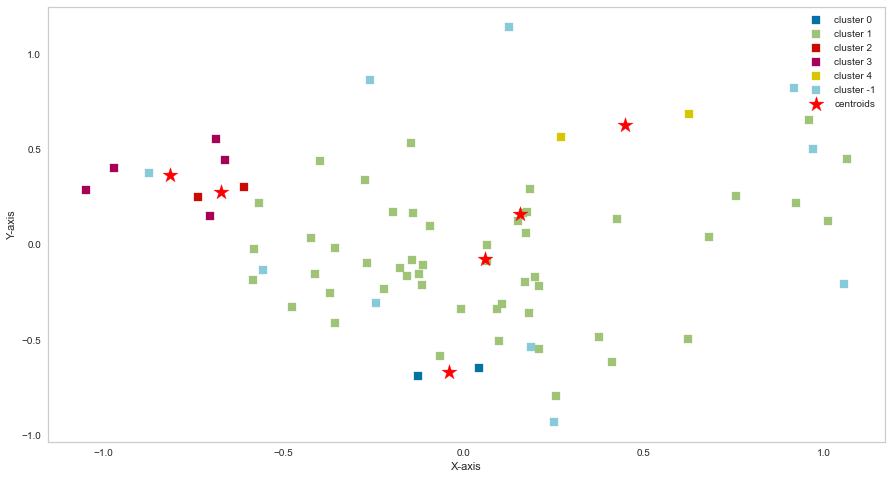

In [794]:
# DBSCAN Cluster
plot_clusters(np.array(X), y_db)

## Model Evaluation

* To evaluate our k-means models, we can use inertia, aka an elbow plot to help choose the optimal number of clusters

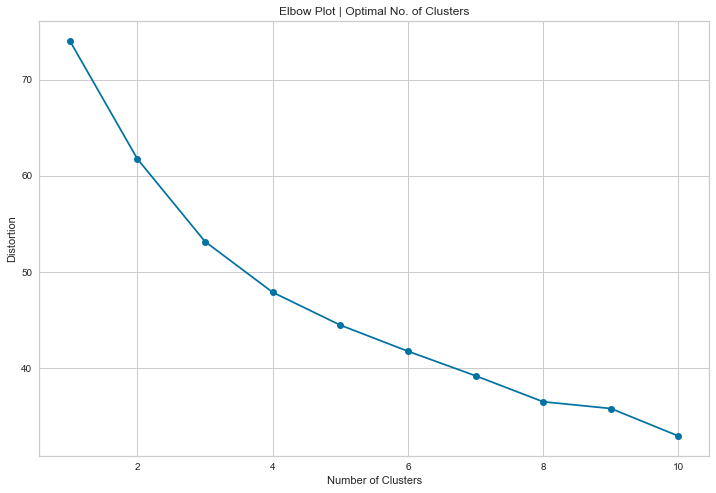

In [795]:
# Create elbow plot
X = nyc_scaled

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.rcParams["figure.figsize"] = (12,8) 
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Plot | Optimal No. of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

K = 2

* To evaluate our hierarchical model, we can use a dendrogram to help choose the optimal number of clusters

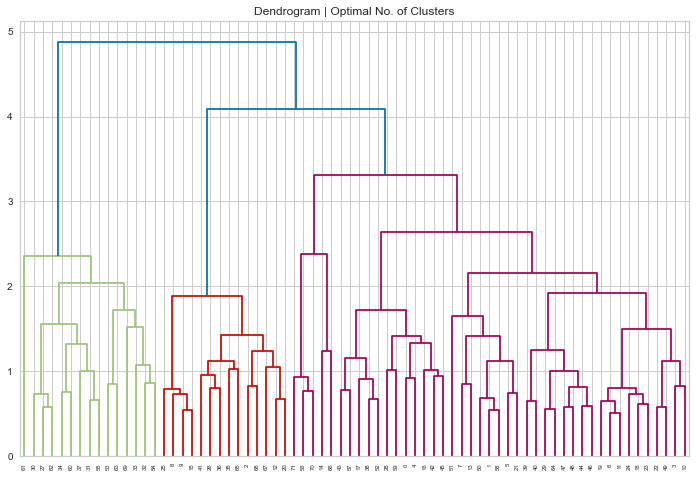

In [796]:
# Create a dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram | Optimal No. of Clusters")
plt.show()

Clusters = 3

* To further evaluate our k-means models, we can visualize the optimal amount of clusters with a [silhoutte plot and score](https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam)

In [797]:
from sklearn import metrics
# Calculate silhoutte score of k-means clustering
score = metrics.silhouette_score(X, km.labels_, metric='euclidean')

# Print score to 3 decimal places
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.122


The value of the silhouette score varies from -1 to 1. 
* \>0 to 1 indicates that the clusters are dense and well-separated
* 0 represents overlapping clusters with samples very close to the decision boundary of neighboring clusters.
* -1 to 0 indicates that samples may have been assigned to the wrong clusters

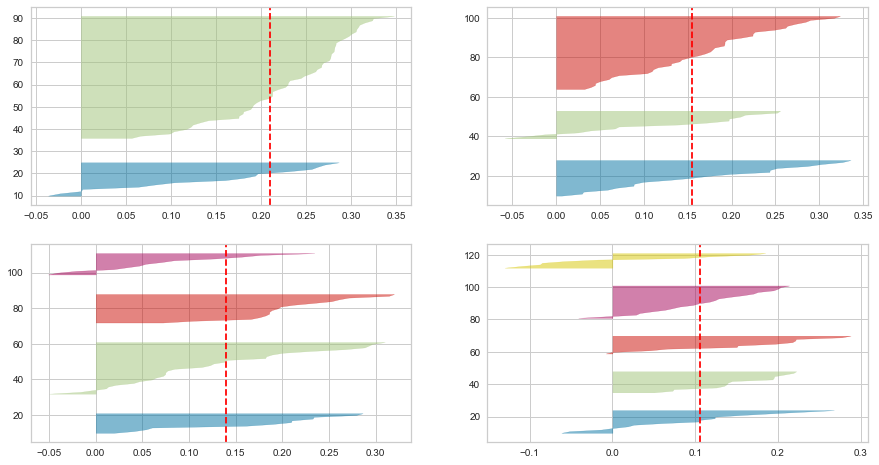

In [798]:
from yellowbrick.cluster import SilhouetteVisualizer

# Create silhoutte plots to visualize the effectiveness of varying number of clusters (2, 3, 4, and 5)
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
 
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100)
    q, mod = divmod(i, 2)
  
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

Based on the analysis of the silhoutte plots:
* 5 clusters is suboptimal as one cluster does not make it over the average silhoutte score, as well all the widths of each silhoutte being thin and disproportionate
* 4 clusters look to be a slight improvement over 5, with cluster widths starting to widen, and all clusters being over the average silhoutte score
* 2 and 3 clusters look optimal, with 3 being the most optimal, as all clusters are over the average score, and have a more uniform thickness and cluster distribution